## Lección 6: Modelos de Factores de Carga

### Objetivos Notebook Lección 6. 

1. Implementar el modelo de factores de carga en Python. 
2. Realizar un pronóstico del nivel de tasas, empleando un modelo VAR. Usando las siguientes variables: 

### Ejercicio

Usar el modelo de factores de carga para interpolar la curva de rendimientos con corte al 31/10/2018. 

Aclaración: Este notebook tiene una notación distinta a la de la presentación principalmente por temas de convergencia del algoritmo. Particularmente lambda está expresado como su inverso. 

In [156]:
from scipy.optimize import fmin
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from librerias.extract_data import get_data 
from librerias.graphs import *

yield_df = get_data(start_year=2018,end_year=2019)

In [157]:
yield_series = yield_df.loc["2018-10-31",:]
def period_to_months(period):
    number, unit = period.split(' ')
    number = int(number)
    if unit == 'Yr':
        return number * 12
    return number


def standardizeYieldSeries(yield_series):
    yield_df = yield_series.to_frame()
    yield_df.columns = ['Yield']
    yield_df.loc['9 Mo',:] = np.nan
    yield_df.loc['4 Yr',:] = np.nan
    yield_df.loc['6 Yr',:] = np.nan
    yield_df.loc['8 Yr',:] = np.nan
    yield_df = yield_df.reset_index().rename(columns = {'index': 'TimePeriod'})
    yield_df['Yield'] = yield_df['Yield']/100
        
    
    yield_df['TimePeriodInMonths'] = yield_df['TimePeriod'].apply(period_to_months)
    yield_df = yield_df.sort_values('TimePeriodInMonths')
    yield_df['Maturity'] = yield_df['TimePeriodInMonths']/12
    # If you don't want to keep the 'TimePeriodInMonths' column, you can drop it
    yield_df = yield_df.reset_index(drop=True)
    yield_df
    return yield_df

yield_df = standardizeYieldSeries(yield_series)
yield_df

,TimePeriod,Yield,TimePeriodInMonths,Maturity
0,3 Mo,0.0234,3,0.25
1,6 Mo,0.0249,6,0.50
2,9 Mo,NaN,9,0.75
3,1 Yr,0.0269,12,1.00
4,2 Yr,0.0287,24,2.00
5,3 Yr,0.0293,36,3.00
6,4 Yr,NaN,48,4.00
7,5 Yr,0.0298,60,5.00
8,6 Yr,NaN,72,6.00
9,7 Yr,0.0307,84,7.00


In [158]:
β0 = 0.01
β1 = 0.01
β2 = 0.01
λ = 1.00

In [159]:
yield_df

,TimePeriod,Yield,TimePeriodInMonths,Maturity
0,3 Mo,0.0234,3,0.25
1,6 Mo,0.0249,6,0.50
2,9 Mo,NaN,9,0.75
3,1 Yr,0.0269,12,1.00
4,2 Yr,0.0287,24,2.00
5,3 Yr,0.0293,36,3.00
6,4 Yr,NaN,48,4.00
7,5 Yr,0.0298,60,5.00
8,6 Yr,NaN,72,6.00
9,7 Yr,0.0307,84,7.00


In [160]:
yield_df_1 = yield_df.copy()
yield_df_1

,TimePeriod,Yield,TimePeriodInMonths,Maturity
0,3 Mo,0.0234,3,0.25
1,6 Mo,0.0249,6,0.50
2,9 Mo,NaN,9,0.75
3,1 Yr,0.0269,12,1.00
4,2 Yr,0.0287,24,2.00
5,3 Yr,0.0293,36,3.00
6,4 Yr,NaN,48,4.00
7,5 Yr,0.0298,60,5.00
8,6 Yr,NaN,72,6.00
9,7 Yr,0.0307,84,7.00


In [161]:
def NelsonSiegel(df, β0, β1, β2, λ):
    df['NS'] =(β0)+(β1*((1-np.exp(-df['Maturity']/λ))/(df['Maturity']/λ)))+(β2*((((1-np.exp(-df['Maturity']/λ))/(df['Maturity']/λ)))-(np.exp(-df['Maturity']/λ))))
    df.style.format({'Maturity': '{:,.0f}'.format,'Yield': '{:,.2%}','NS': '{:,.2%}'})
    return df
yield_df_1 = NelsonSiegel(yield_df_1, β0, β1, β2, λ)

In [162]:
yield_df_1

,TimePeriod,Yield,TimePeriodInMonths,Maturity,NS
0,3 Mo,0.0234,3,0.25,0.019908
1,6 Mo,0.0249,6,0.50,0.019673
2,9 Mo,NaN,9,0.75,0.019347
3,1 Yr,0.0269,12,1.00,0.018964
4,2 Yr,0.0287,24,2.00,0.017293
5,3 Yr,0.0293,36,3.00,0.015837
6,4 Yr,NaN,48,4.00,0.014725
7,5 Yr,0.0298,60,5.00,0.013906
8,6 Yr,NaN,72,6.00,0.013300
9,7 Yr,0.0307,84,7.00,0.012845


In [163]:
def computeResidual(df):
    df['Residual'] =  (df['Yield'] - df['NS'])**2
    df22 = df[['Maturity','Yield','NS','Residual']]  
    return df22
yield_df_1 = computeResidual(yield_df_1)
yield_df_1

,Maturity,Yield,NS,Residual
0,0.25,0.0234,0.019908,0.000012
1,0.50,0.0249,0.019673,0.000027
2,0.75,NaN,0.019347,NaN
3,1.00,0.0269,0.018964,0.000063
4,2.00,0.0287,0.017293,0.000130
5,3.00,0.0293,0.015837,0.000181
6,4.00,NaN,0.014725,NaN
7,5.00,0.0298,0.013906,0.000253
8,6.00,NaN,0.013300,NaN
9,7.00,0.0307,0.012845,0.000319


In [164]:
def myval(c):
    df = yield_df.copy()
    df['NS'] =(c[0])+(c[1]*((1-np.exp(-df['Maturity']/c[3]))/(df['Maturity']/c[3])))+(c[2]*((((1-np.exp(-df['Maturity']/c[3]))/(df['Maturity']/c[3])))-(np.exp(-df['Maturity']/c[3]))))
    df['Residual'] =  (df['Yield'] - df['NS'])**2
    val = np.sum(df['Residual'])
    print("[β0, β1, β2, λ]=",c,", SUM:", val)
    return(val)

def getOptimalLoadings(myval, initial_guess):
    c = fmin(myval, initial_guess)
    return c 

c = getOptimalLoadings(myval, [0.01, 0.00, -0.01, 1.0])


[β0, β1, β2, λ]= [ 0.01  0.   -0.01  1.  ] , SUM: 0.004428935183714751
[β0, β1, β2, λ]= [ 0.0105  0.     -0.01    1.    ] , SUM: 0.0042230191265077155
[β0, β1, β2, λ]= [ 1.0e-02  2.5e-04 -1.0e-02  1.0e+00] , SUM: 0.0043959085260602895
[β0, β1, β2, λ]= [ 0.01    0.     -0.0105  1.    ] , SUM: 0.00446256844392798
[β0, β1, β2, λ]= [ 0.01  0.   -0.01  1.05] , SUM: 0.004437124360930191
[β0, β1, β2, λ]= [ 1.025e-02  1.250e-04 -9.500e-03  1.025e+00] , SUM: 0.004279769471585108
[β0, β1, β2, λ]= [ 1.0375e-02  1.8750e-04 -9.7500e-03  9.6250e-01] , SUM: 0.004227573143192789
[β0, β1, β2, λ]= [ 1.05625e-02  2.81250e-04 -9.62500e-03  9.93750e-01] , SUM: 0.004136460329688963
[β0, β1, β2, λ]= [ 1.084375e-02  4.218750e-04 -9.437500e-03  9.906250e-01] , SUM: 0.003994355217247605
[β0, β1, β2, λ]= [ 1.0984375e-02  1.1718750e-04 -9.3437500e-03  9.8906250e-01] , SUM: 0.00397035505822668
[β0, β1, β2, λ]= [ 1.14765625e-02  5.07812500e-05 -9.01562500e-03  9.83593750e-01] , SUM: 0.003765835912419937
[β0, β1, β2

In [165]:
β0 = c[0]
β1 = c[1]
β2 = c[2]
λ = c[3]
print("[β0, β1, β2, λ]=", [c[0].round(2), c[1].round(2), c[2].round(2), c[3].round(2)])

[β0, β1, β2, λ]= [0.03, -0.01, -0.0, 1.43]


In [166]:
yield_df = NelsonSiegel(yield_df, β0, β1, β2, λ)
yield_df

,TimePeriod,Yield,TimePeriodInMonths,Maturity,NS
0,3 Mo,0.0234,3,0.25,0.024093
1,6 Mo,0.0249,6,0.50,0.024847
2,9 Mo,NaN,9,0.75,0.025520
3,1 Yr,0.0269,12,1.00,0.026123
4,2 Yr,0.0287,24,2.00,0.027977
5,3 Yr,0.0293,36,3.00,0.029209
6,4 Yr,NaN,48,4.00,0.030053
7,5 Yr,0.0298,60,5.00,0.030651
8,6 Yr,NaN,72,6.00,0.031087
9,7 Yr,0.0307,84,7.00,0.031414


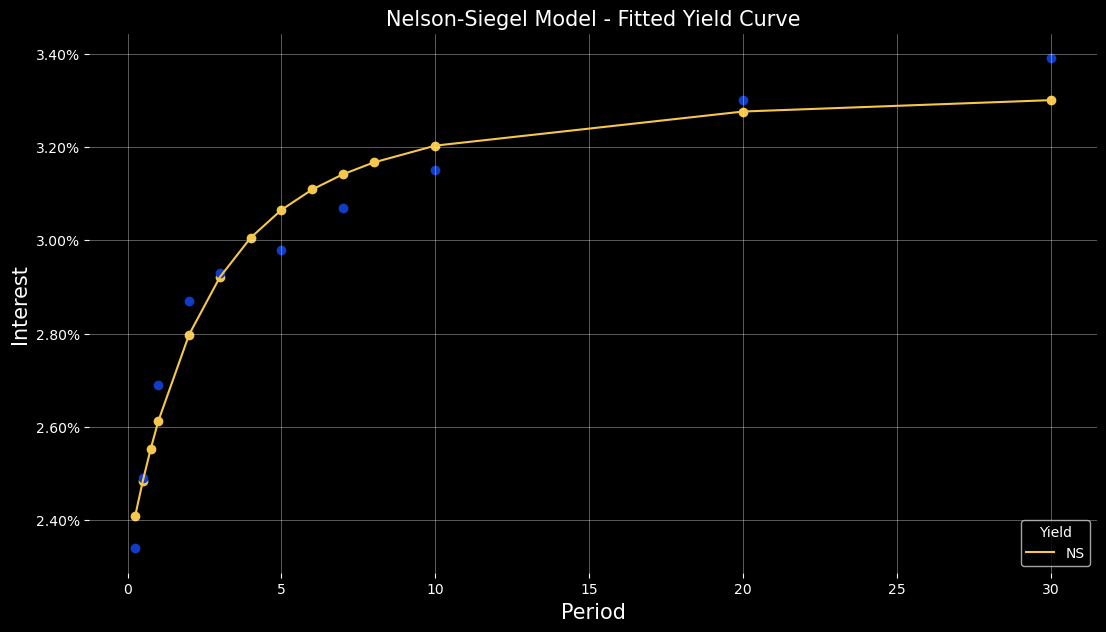

In [167]:
def plot_yield_curve(df):
    df['Y'] = round(df['Yield']*100,4)
    df['NS'] =(β0)+(β1*((1-np.exp(-df['Maturity']/λ))/(df['Maturity']/λ)))+(β2*((((1-np.exp(-df['Maturity']/λ))/(df['Maturity']/λ)))-(np.exp(-df['Maturity']/λ))))
    df['N'] = round(df['NS']*100,4)
    df2 = df.copy()
    df2 = df2.style.format({'Maturity': '{:,.2f}'.format,'Y': '{:,.2%}', 'N': '{:,.2%}'})
    import matplotlib.pyplot as plt
    import matplotlib.markers as mk
    import matplotlib.ticker as mtick
    plt.style.use('dark_background')
    fontsize=15
    fig = plt.figure(figsize=(13,7))
    ax = plt.axes()
    X = df["Maturity"]
    Y = df["Y"]
    x = df["Maturity"]
    y = df["N"]
    ax.plot(x, y, color="#F5C74D", label="NS") #orange
    plt.scatter(x, y, marker="o", c="#F5C74D") #orange
    plt.scatter(X, Y, marker="o", c="#103CC8") #blue
    plt.xlabel('Period',fontsize=fontsize)
    plt.ylabel('Interest',fontsize=fontsize)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc="lower right", title="Yield")
    plt.grid(True, linewidth=0.5, alpha=0.5)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.title("Nelson-Siegel Model - Fitted Yield Curve",fontsize=fontsize)
    
    plt.show()
plot_yield_curve(yield_df)

### Ejercicio en series de tiempo

A continuación vamos a realizar el mismo ejercicio a lo largo del tiempo, con el objetivo de obtener un lamda a lo largo del tiempo. 

In [168]:
yield_df = get_data(start_year=2018,end_year=2019)
yield_df

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2018-12-31,2.45,2.56,2.63,2.48,2.46,2.51,2.59,2.69,2.87,3.02
2018-12-28,2.40,2.48,2.57,2.52,2.50,2.56,2.63,2.72,2.89,3.04
2018-12-27,2.41,2.49,2.58,2.56,2.55,2.60,2.68,2.77,2.92,3.05
2018-12-26,2.44,2.54,2.61,2.61,2.60,2.67,2.74,2.81,2.94,3.06
2018-12-24,2.45,2.52,2.61,2.55,2.56,2.58,2.66,2.74,2.88,3.00
...,...,...,...,...,...,...,...,...,...,...
2018-01-08,1.45,1.60,1.79,1.96,2.07,2.29,2.41,2.49,2.65,2.81
2018-01-05,1.39,1.58,1.80,1.96,2.06,2.29,2.40,2.47,2.64,2.81
2018-01-04,1.41,1.60,1.82,1.96,2.05,2.27,2.38,2.46,2.62,2.79


In [169]:
loadings_df = pd.DataFrame()
run_historic_data = False
if(run_historic_data):
    for i in yield_df.index: 
        print(i)
        yield_series = yield_df.loc[i,:].copy()
        
        yield_df_1 = standardizeYieldSeries(yield_series)
        print(yield_df_1)
        yield_df_1 = NelsonSiegel(yield_df_1, β0, β1, β2, λ)  
        
        def myval(c):
            df = yield_df_1.copy()
            df['NS'] =(c[0])+(c[1]*((1-np.exp(-df['Maturity']/c[3]))/(df['Maturity']/c[3])))+(c[2]*((((1-np.exp(-df['Maturity']/c[3]))/(df['Maturity']/c[3])))-(np.exp(-df['Maturity']/c[3]))))
            df['Residual'] =  (df['Yield'] - df['NS'])**2
            val = np.sum(df['Residual'])
            print("[β0, β1, β2, λ]=",c,", SUM:", val)
            return(val)

        c = getOptimalLoadings(myval, [0.01, 0.00, -0.01, 1.0])
        loadings_i = pd.Series(c, index = ['beta0', 'beta1', 'beta2', 'lambda'])
        loadings_df = pd.concat([loadings_df, loadings_i], axis = 1)
loadings_df

""


In [170]:
loadings_df = loadings_df.T
loadings_df.index = yield_df.index

In [171]:
loadings_df = pd.read_csv("datos\\"+"NS-Dynamic.csv")
loadings_df.index = pd.to_datetime(loadings_df.iloc[:,0])
loadings_df = loadings_df.iloc[:,1:]

In [172]:
average_lambda = loadings_df['lambda'].mean()
average_lambda
##
print("Usando nuestra notación el lambda promedio es:", round((1/average_lambda),3))

Usando nuestra notación el lambda promedio es: 0.575


In [173]:
loadings_df['Gamma0'] = loadings_df['beta0']+loadings_df['beta1']
loadings_df['Gamma1'] = -loadings_df['beta1']
loadings_df['Gamma2'] = loadings_df['beta2']
loadings_df

,beta0,beta1,beta2,lambda,Gamma0,Gamma1,Gamma2
Date,,,,,,,
2018-12-31,0.033760,-0.008315,-1.215157e-02,5.310998,0.025445,0.008315,-1.215157e-02
2018-12-28,0.036780,-0.012162,-6.814271e-03,11.875818,0.024618,0.012162,-6.814271e-03
2018-12-27,0.035077,-0.010357,2.554479e-08,15.621310,0.024721,0.010357,2.554479e-08
2018-12-26,0.032833,-0.007766,-2.126611e-09,9.511047,0.025068,0.007766,-2.126611e-09
2018-12-24,0.034736,-0.009666,-5.297012e-03,10.784930,0.025070,0.009666,-5.297012e-03
...,...,...,...,...,...,...,...
2018-01-08,0.028490,-0.014148,-5.243965e-07,2.129184,0.014343,0.014148,-5.243965e-07
2018-01-05,0.028314,-0.014405,1.473158e-07,1.970519,0.013909,0.014405,1.473158e-07
2018-01-04,0.028124,-0.013879,-1.129490e-07,2.058901,0.014244,0.013879,-1.129490e-07


<Axes: >

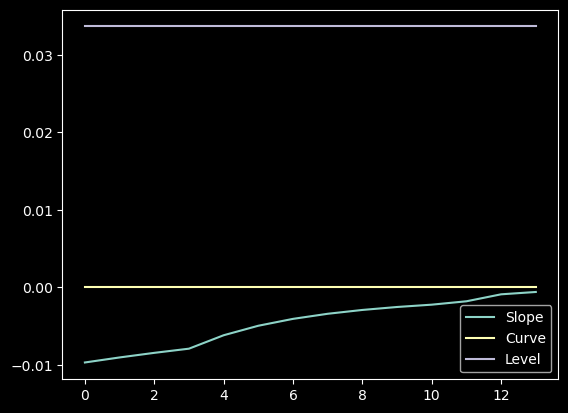

In [174]:
level = loadings_df.loc["2018-10-31",'beta0']
slope = loadings_df.loc["2018-10-31",'beta1']*((1-np.exp(-yield_df_1['Maturity']/average_lambda))/(yield_df_1['Maturity']/average_lambda))
curve = loadings_df.loc["2018-10-31",'beta2']*((((1-np.exp(-yield_df_1['Maturity']/average_lambda))/(yield_df_1['Maturity']/average_lambda)))-(np.exp(-yield_df_1['Maturity']/average_lambda)))

df_model1 = pd.concat([slope.rename('Slope'), curve.rename('Curve')], axis = 1)
df_model1['Level'] = level
df_model1.plot() 

<Axes: >

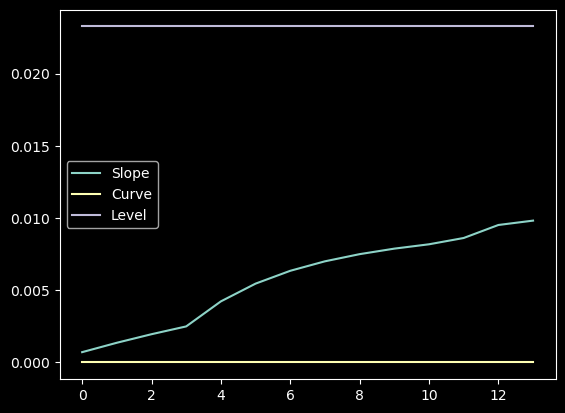

In [175]:
short_run_level = loadings_df.loc["2018-10-31",'Gamma0']
slope = loadings_df.loc["2018-10-31",'Gamma1']*(1-(1-np.exp(-yield_df_1['Maturity']/average_lambda))/(yield_df_1['Maturity']/average_lambda))
curve = loadings_df.loc["2018-10-31",'Gamma2']*((((1-np.exp(-yield_df_1['Maturity']/average_lambda))/(yield_df_1['Maturity']/average_lambda)))-(np.exp(-yield_df_1['Maturity']/average_lambda)))

df_model1 = pd.concat([slope.rename('Slope'), curve.rename('Curve')], axis = 1)
df_model1['Level'] = short_run_level
df_model1.plot()